In [2]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
total = 'C:/hse_compling/diploma/data/eval/eval_data_lower_long.csv' #обучение на всем словаре целиком
test_full = 'C:/hse_compling/diploma/data/eval/eval_test_full.csv' #обучение на 3/4 всех классов
filtered_test_full = 'C:/hse_compling/diploma/data/eval/eval_filtered_test_full.csv' #обучение на 3/4 всех классов без неизменяемых

In [4]:
data = pd.read_csv(total, encoding='utf-8',sep='\t')
test_full_data = pd.read_csv(test_full, encoding='utf-8',sep='\t')
filtered_test_full_data = pd.read_csv(filtered_test_full, encoding='utf-8',sep='\t')

### Accuracy

In [4]:
def accuracy(model,data):
    column = model + '_eval'
    eval_ = data[column]
    value_counts =  eval_.value_counts()
    acc = eval_.value_counts()[True]/(len(eval_))
    acc = round(acc,4)
    print('for model {}:'.format(model))
    print('False:', value_counts[False])
    print('True:', value_counts[True])
    print('accuracy:',acc)

In [8]:
#accuracy('seq2seq', data) 

In [9]:
#accuracy('pymorphy', data)

In [10]:
#accuracy('seq2seq', test_full_data)

In [11]:
#accuracy('pymorphy', test_full_data)

In [9]:
accuracy('seq2seq', filtered_test_full_data)

for model seq2seq:
False: 9869
True: 116527
accuracy: 0.9219


In [10]:
accuracy('pymorphy', filtered_test_full_data)

for model pymorphy:
False: 2479
True: 123917
accuracy: 0.9804


In [3]:
#creating data frame with group by.
#rows: classes
#columns: class, seq2seq True count, pymorphy True count, total count of instances in class
def df_for_plot(dataframe):
    plot = dataframe[['classtag', 'pymorphy_eval', 'seq2seq_eval']].copy()
    plot['total_count'] = [1]*plot.shape[0]
    plot = plot.groupby(['classtag'], sort=True).aggregate(lambda x: int(sum(x)))
    plot = plot.sort_values(by=['total_count'], ascending=False)
    return plot

### Распределение словоформ по классам (на всех данных)

In [12]:
total_plot = df_for_plot(data)

In [ ]:
total_plot[:3]

In [1]:
ax = total_plot['total_count'][:50].plot.bar(stacked = False,  figsize = (20,10))
ax.set_xlabel('классы', fontsize=18)
ax.set_ylabel('количество словоформ', fontsize=18)
ax.set_title("Распределение словоформ по классам", fontsize=18)
ax.grid(color='tab:grey', linestyle='-.', linewidth=1)
ax.set_ylim([0,105000])

for p in ax.patches:
    ax.annotate(str(int(p.get_height()/12)), (p.get_x() * 1.005, p.get_height() +3500),  rotation =45, fontsize=14)

NameError: name 'total_plot' is not defined

### Accuracy seq2seq модели и анализатора pymorphy2


In [12]:
plot_data = df_for_plot(filtered_test_full_data)


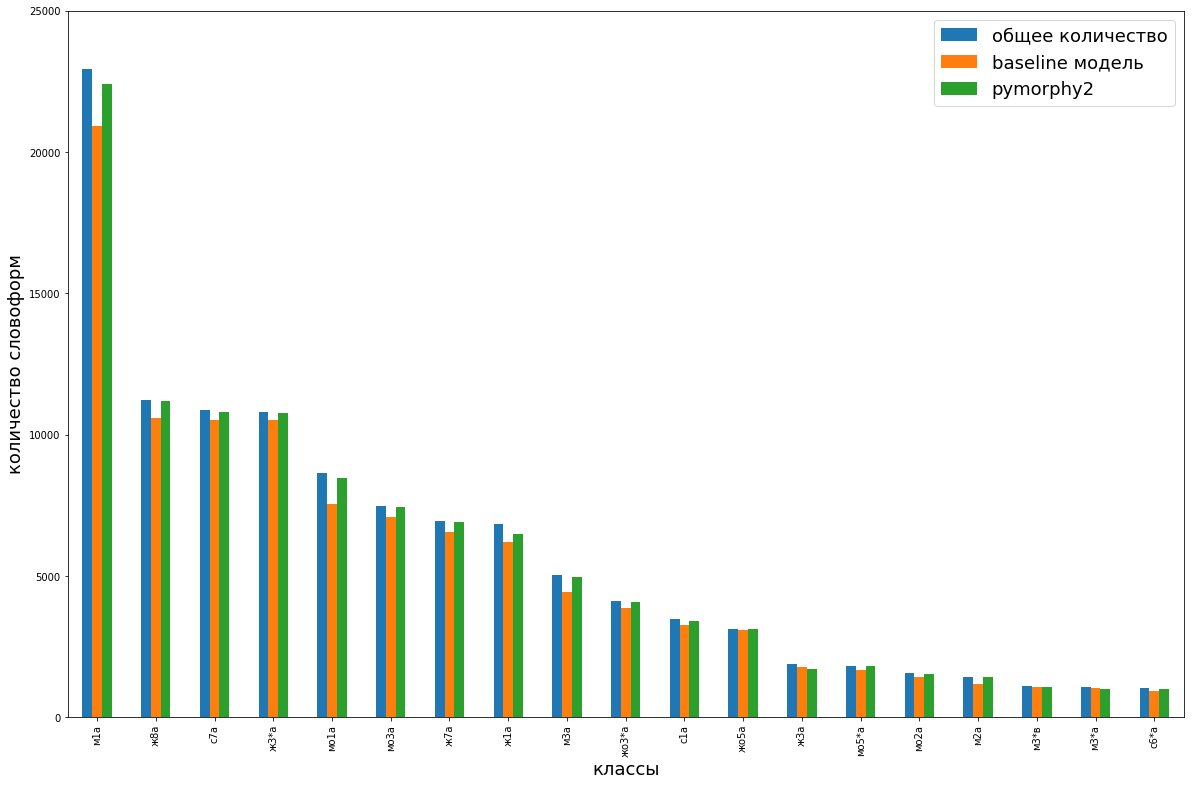

In [35]:
ax = plot_data[['total_count', 'seq2seq_eval', 'pymorphy_eval']][:19].plot.bar(stacked = False, figsize = (20,13))
ax.set_xlabel('классы', fontsize=18)
ax.set_ylabel('количество словоформ', fontsize=18)
#ax.set_title('Accuracy работы baseline модели и анализатора pymorphy2', fontsize=18)
ax.set_ylim([0,25000])
ax.legend(loc=1, ncol=1, fontsize=18, labels = ['общее количество', 'baseline модель', 'pymorphy2'])
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()+2000),  rotation =45, fontsize=12, clip_on=True)

### более нагядно сравнение seq2seq и pymorphy2 на самых крупных классах

In [14]:
plot_data['ratio'] = plot_data['seq2seq_eval']/plot_data['pymorphy_eval'] - 1

In [36]:
plot_data[(plot_data['ratio'] > 0)]

,pymorphy_eval,seq2seq_eval,total_count,ratio
classtag,,,,
ж3а,1729,1791,1884,0.035859
м3*а,994,1041,1080,0.047284
м6а,348,376,444,0.080460
ж1в,74,83,108,0.121622
с5*а,94,97,108,0.031915
"ж2а""2""",31,45,48,0.451613
ж4в,30,42,48,0.400000
ж6*а,28,32,36,0.142857
ж6*в,27,28,36,0.037037


In [44]:
test_full_data[(test_full_data['classtag']=='ж1в') & (test_full_data['pymorphy_eval']== False)][:5]

,lemma,gender,formtag,classtag,form,pymorphy_predictions,pymorphy_eval,seq2seq_predictions,seq2seq_eval
10592,хна,ж,25,ж1в,хнах,хнами,False,хвами,False
16153,череда,ж,12,ж1в,череды,череда,False,череды,True
18005,хна,ж,23,ж1в,хны,хнам,False,хнам,False
24936,череда,ж,15,ж1в,чередой,чередом,False,чередой,True
33858,кошева,ж,22,ж1в,кошёв,кошевых,False,кошев,False


Text(0.5,1,'Сравнение результатов работы seq2seq модели c работой анализатора pymorphy2')

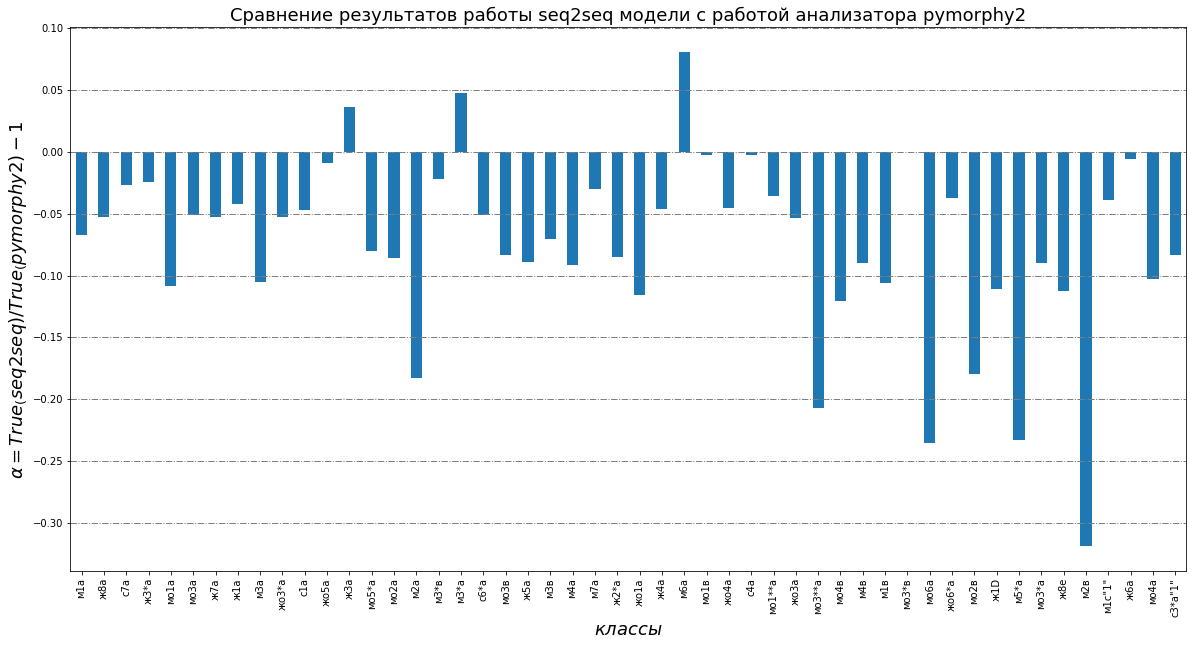

In [43]:
ax = plot_data['ratio'][:50].plot.bar(stacked = False, figsize = (20,10))
ax.yaxis.grid(color='tab:grey', linestyle='-.', linewidth=1)
ax.set_xlabel('$классы$', fontsize=18)
ax.set_ylabel(r'$\alpha = True_(seq2seq) / True_(pymorphy2) -1$', fontsize=18)
ax.set_title("Сравнение результатов работы seq2seq модели c работой анализатора pymorphy2", fontsize=18)

In [39]:
filtered_test_full_data.loc[(filtered_test_full_data['classtag'] == 'м2в')  & (filtered_test_full_data['pymorphy_eval'] == True)]

,lemma,gender,formtag,classtag,form,pymorphy_predictions,pymorphy_eval,seq2seq_predictions,seq2seq_eval
88,штырь,м,25,м2в,штырями,штырями,True,штырями,True
1157,стихарь,м,14,м2в,стихарь,стихарь,True,стихаря,False
2880,октябрь,м,12,м2в,октября,октября,True,октября,True
3696,ревень,м,26,м2в,ревенях,ревенях,True,ревнях,False
3794,янтарь,м,15,м2в,янтарём,янтарём,True,янтарём,True
5290,щавель,м,23,м2в,щавелям,щавелям,True,щавелям,True
5340,октябрь,м,23,м2в,октябрям,октябрям,True,октябрям,True
5443,алтарь,м,14,м2в,алтарь,алтарь,True,алтарь,True
6641,щавель,м,14,м2в,щавель,щавель,True,щавлё,False
7999,ячмень,м,13,м2в,ячменю,ячменю,True,ячменю,True
